In [1]:
import os
print(os.path)
%pip install seaborn

<module 'posixpath' (frozen)>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,LassoCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
train = pd.read_csv("./ConsumerCred-train.csv")
#change columns
train = train.drop('id',axis=1)
train.rename(columns = {'SeriousDlqin2yrs':'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines':'RevolvingUtilizationOfUnsecuredLines', 'age':'age',
       'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio':'DebtRatio', 'MonthlyIncome':'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans':'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate':'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines':'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents':'NumberOfDependents'},inplace=True)
test = pd.read_csv("./ConsumerCred-test.csv",sep = ",")
test = test.drop('id',axis=1)
test.rename(columns = {'SeriousDlqin2yrs':'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines':'RevolvingUtilizationOfUnsecuredLines', 'age':'age',
       'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio':'DebtRatio', 'MonthlyIncome':'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans':'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate':'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines':'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents':'NumberOfDependents'},inplace=True)

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      112500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 2   age                                   112500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 4   DebtRatio                             112500 non-null  float64
 5   MonthlyIncome                         90169 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 7   NumberOfTimes90DaysLate               112500 non-null  int64  
 8   NumberRealEstateLoansOrLines          112500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 10  NumberOfDependents                    109509 non-null  float64
dtype

In [5]:
print(train.head().T)

                                                0            1            2  \
SeriousDlqin2yrs                         1.000000     0.000000     0.000000   
RevolvingUtilizationOfUnsecuredLines     0.766127     0.957151     0.658180   
age                                     45.000000    40.000000    38.000000   
NumberOfTime30-59DaysPastDueNotWorse     2.000000     0.000000     1.000000   
DebtRatio                                0.802982     0.121876     0.085113   
MonthlyIncome                         9120.000000  2600.000000  3042.000000   
NumberOfOpenCreditLinesAndLoans         13.000000     4.000000     2.000000   
NumberOfTimes90DaysLate                  0.000000     0.000000     1.000000   
NumberRealEstateLoansOrLines             6.000000     0.000000     0.000000   
NumberOfTime60-89DaysPastDueNotWorse     0.000000     0.000000     0.000000   
NumberOfDependents                       2.000000     1.000000     0.000000   

                                               3   

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,112500.0,0.067227,0.250415,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,112500.0,5.875869,216.049516,0.0,0.030293,0.153932,0.558363,29110.0
age,112500.0,52.318018,14.769059,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,112500.0,0.422809,4.225422,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,112500.0,350.538451,1536.092601,0.0,0.174611,0.366913,0.872048,220516.0
MonthlyIncome,90169.0,6651.952456,11147.828705,0.0,3400.000000,5400.000000,8250.000000,1794060.0
NumberOfOpenCreditLinesAndLoans,112500.0,8.463840,5.150094,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,112500.0,0.268124,4.202573,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,112500.0,1.019520,1.133609,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,112500.0,0.243120,4.188614,0.0,0.000000,0.000000,0.000000,98.0


In [7]:
print(train.SeriousDlqin2yrs.value_counts())

0    104937
1      7563
Name: SeriousDlqin2yrs, dtype: int64


In [8]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22331
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2991
dtype: int64

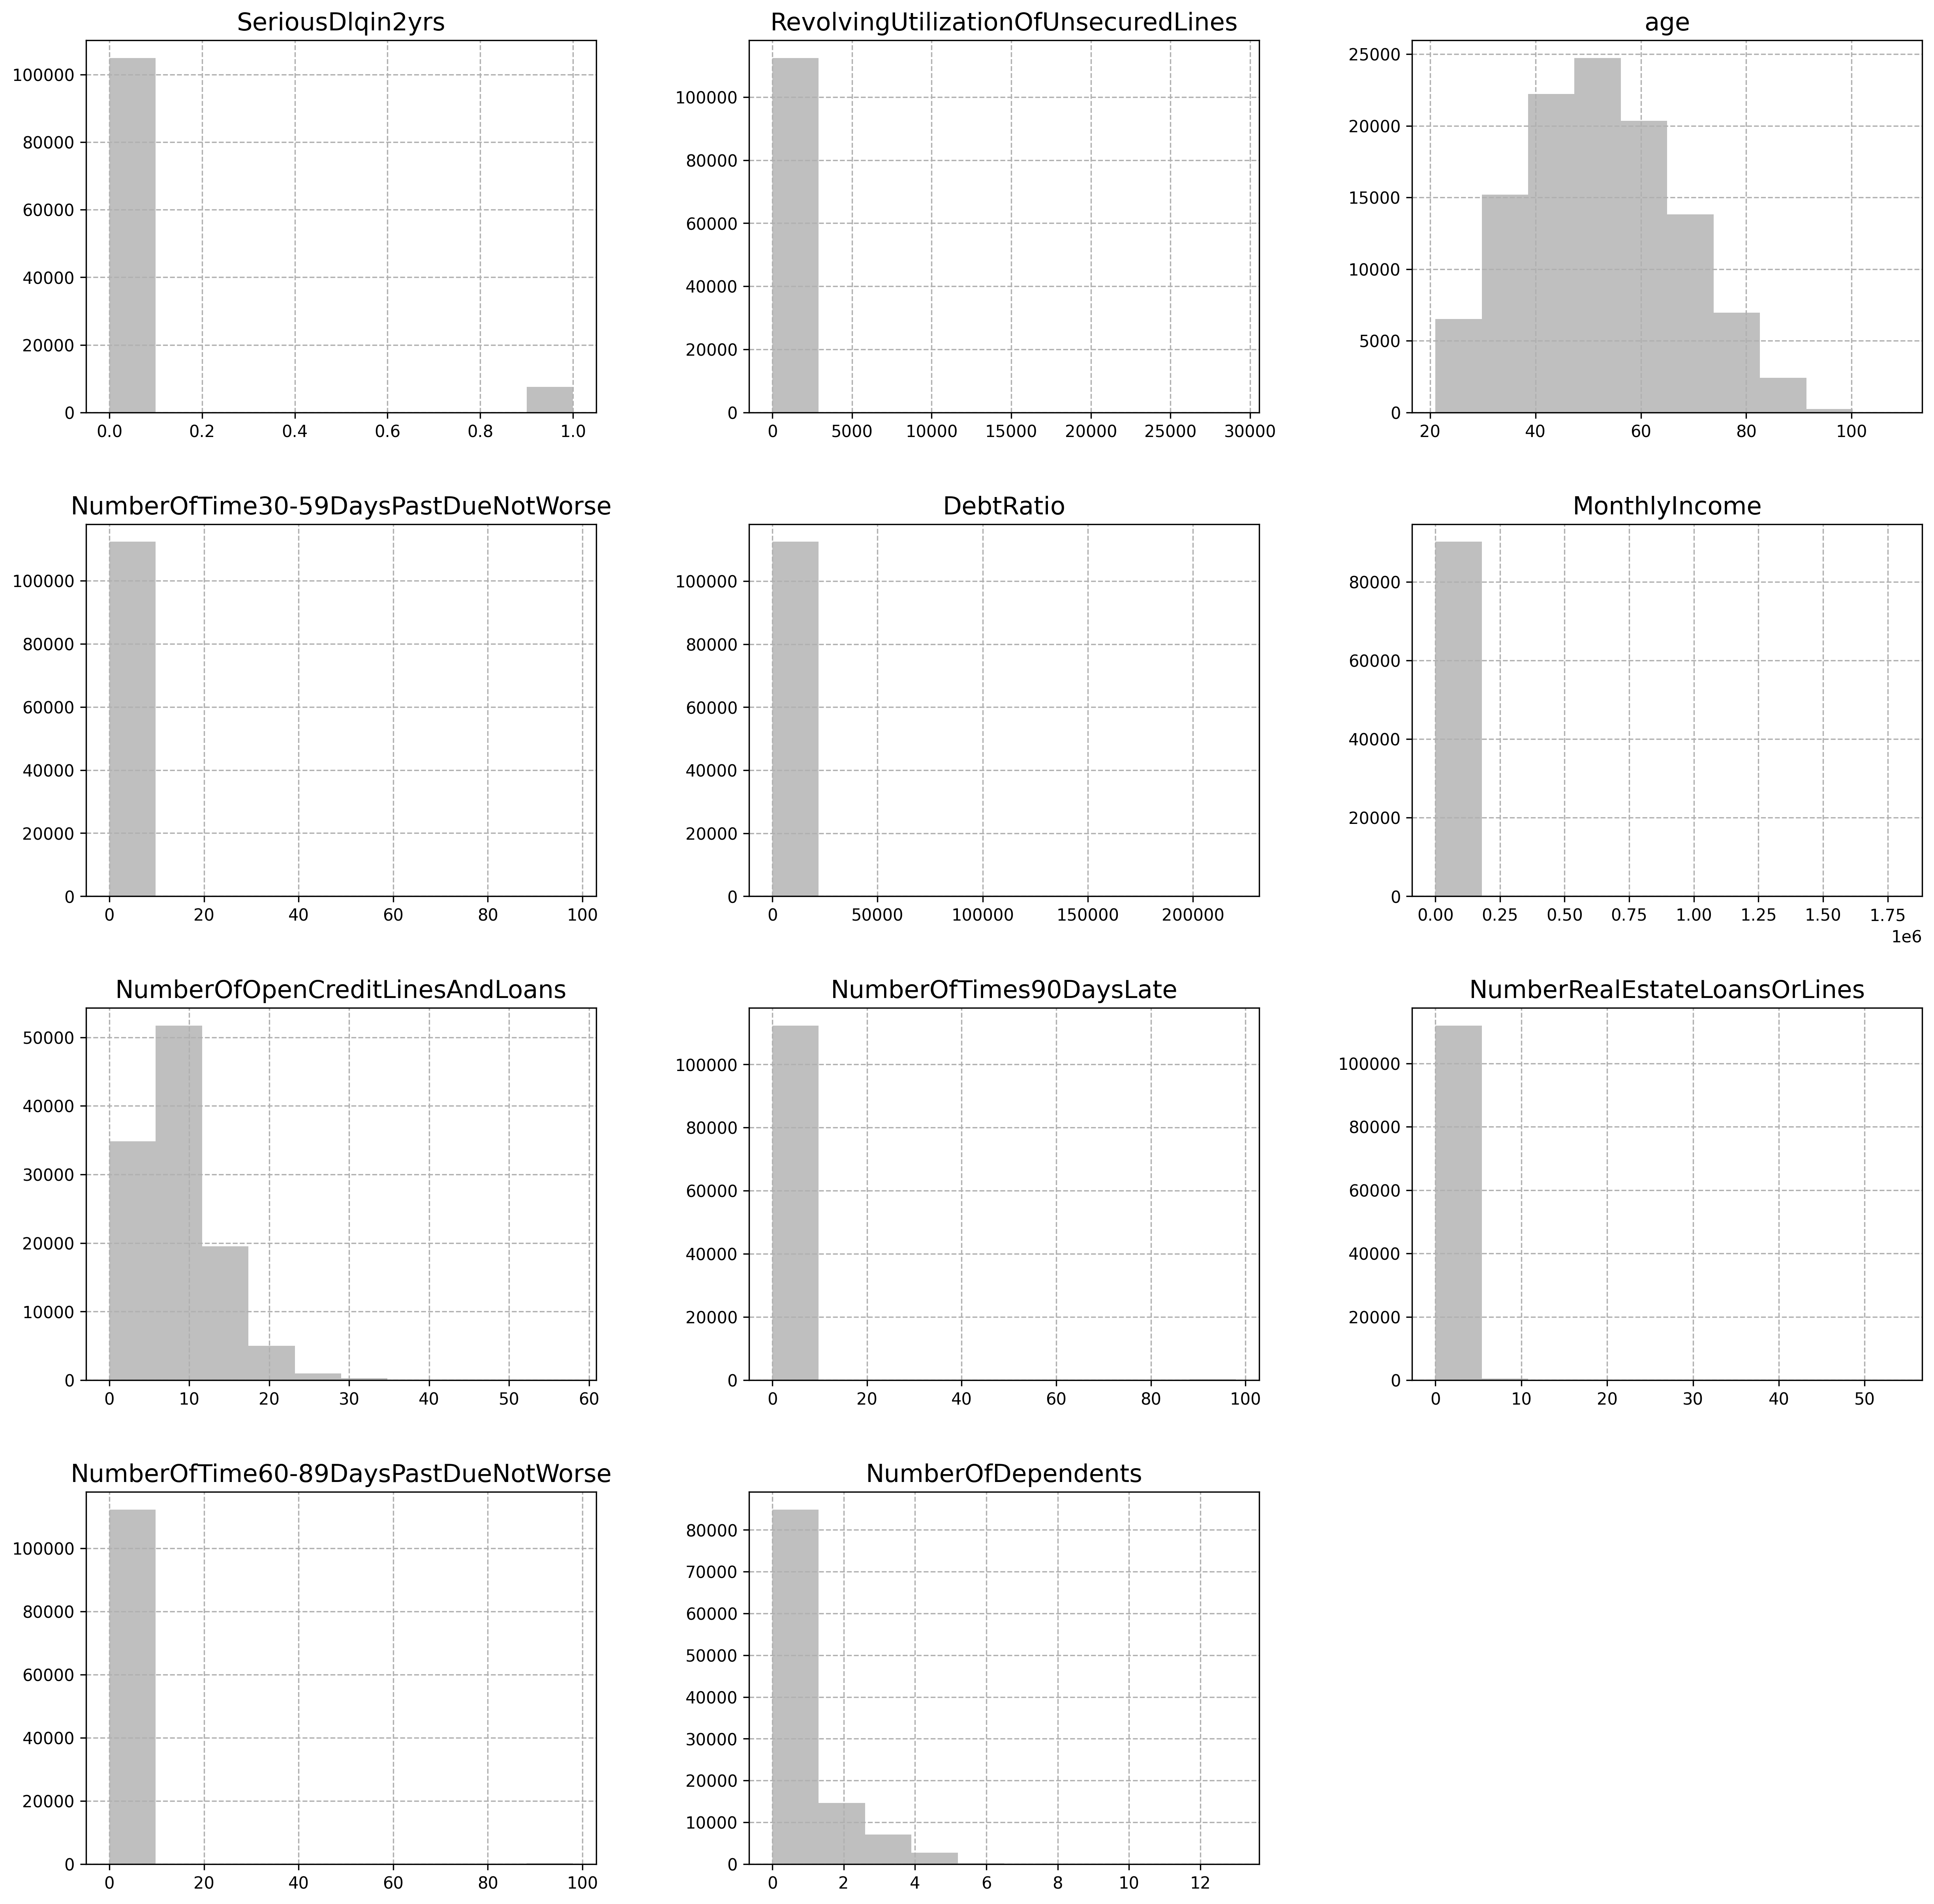

In [9]:
# Output the distribution charts for each field
# Most fields show obvious skewness; consider correction measures in subsequent modeling
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(train.columns):
    plt.subplot(4,3,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    train[i].hist(color='grey',alpha=0.5)

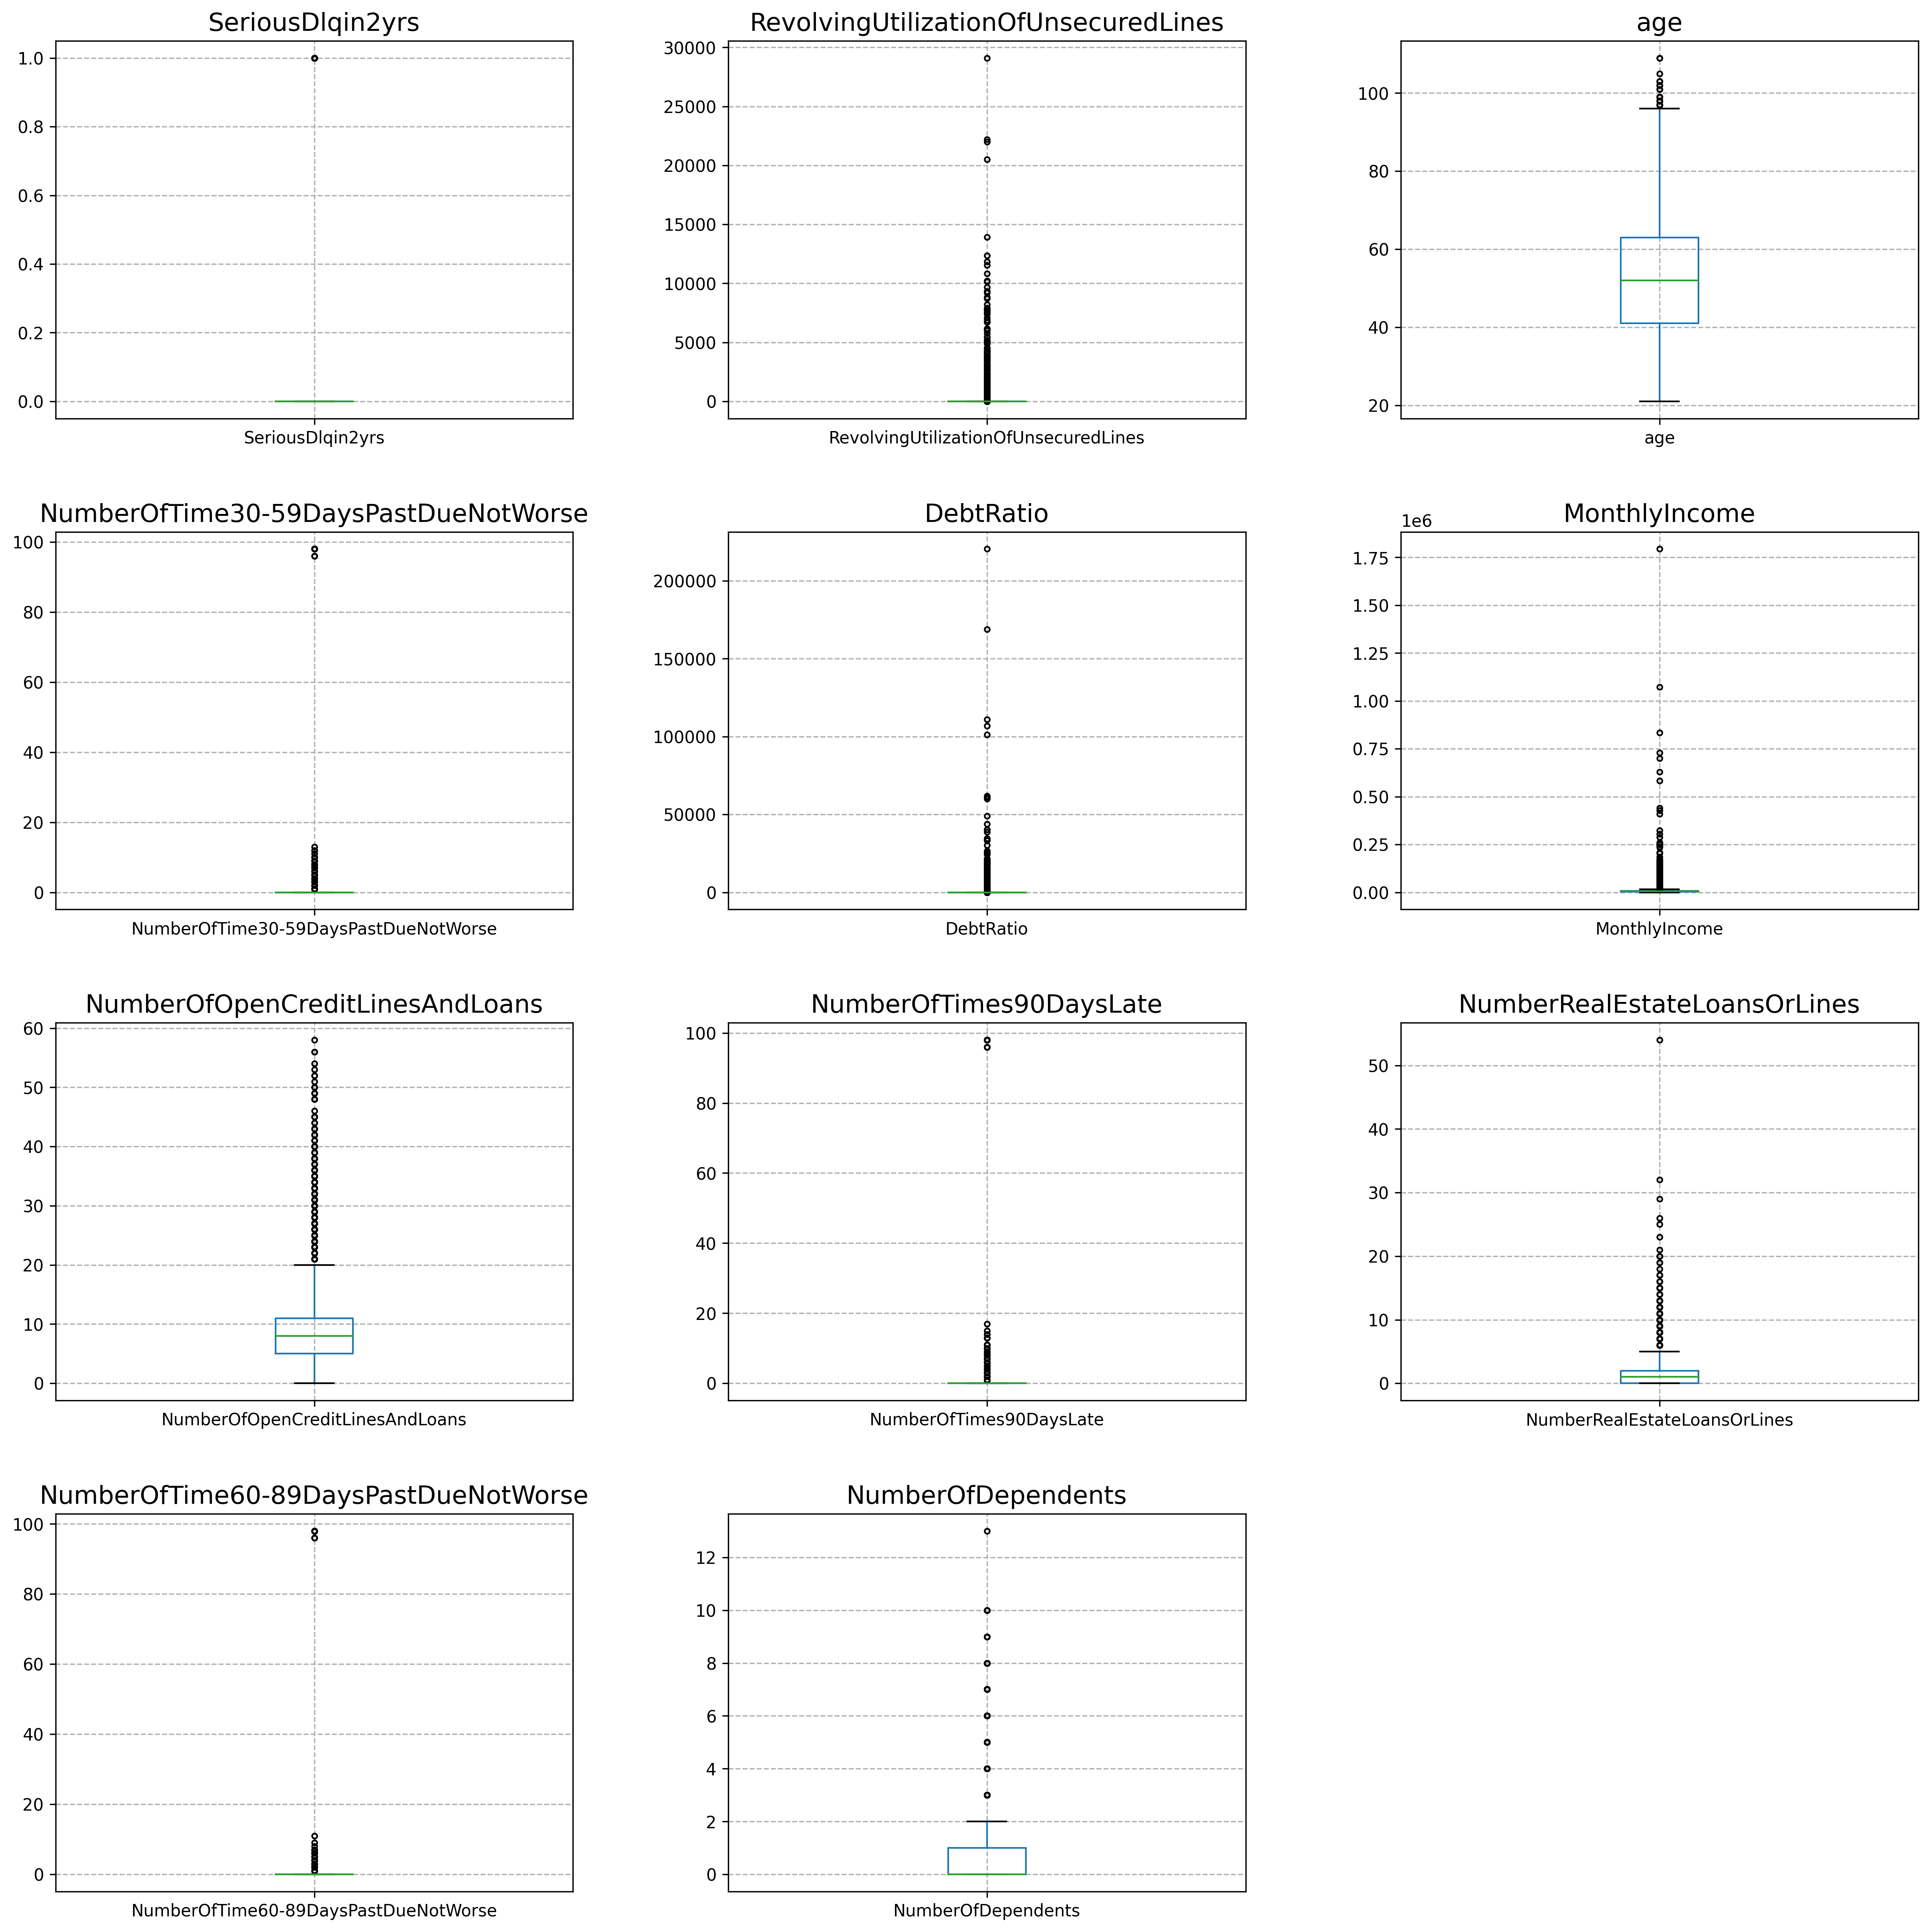

In [10]:
# Observe the anomalies of each field using box plots
# Many anomalies (errors) in DebtRatio; numerous anomalies in RevolvingUtilizationOfUnsecuredLines, theoretically should be less than or equal to 1
# Numerous anomalies in 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', making it difficult to observe data distribution
# Anomalies in the 'age' field need further observation
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(train.columns):
    plt.subplot(4,3,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    train[[i]].boxplot(sym='.')

<AxesSubplot:>

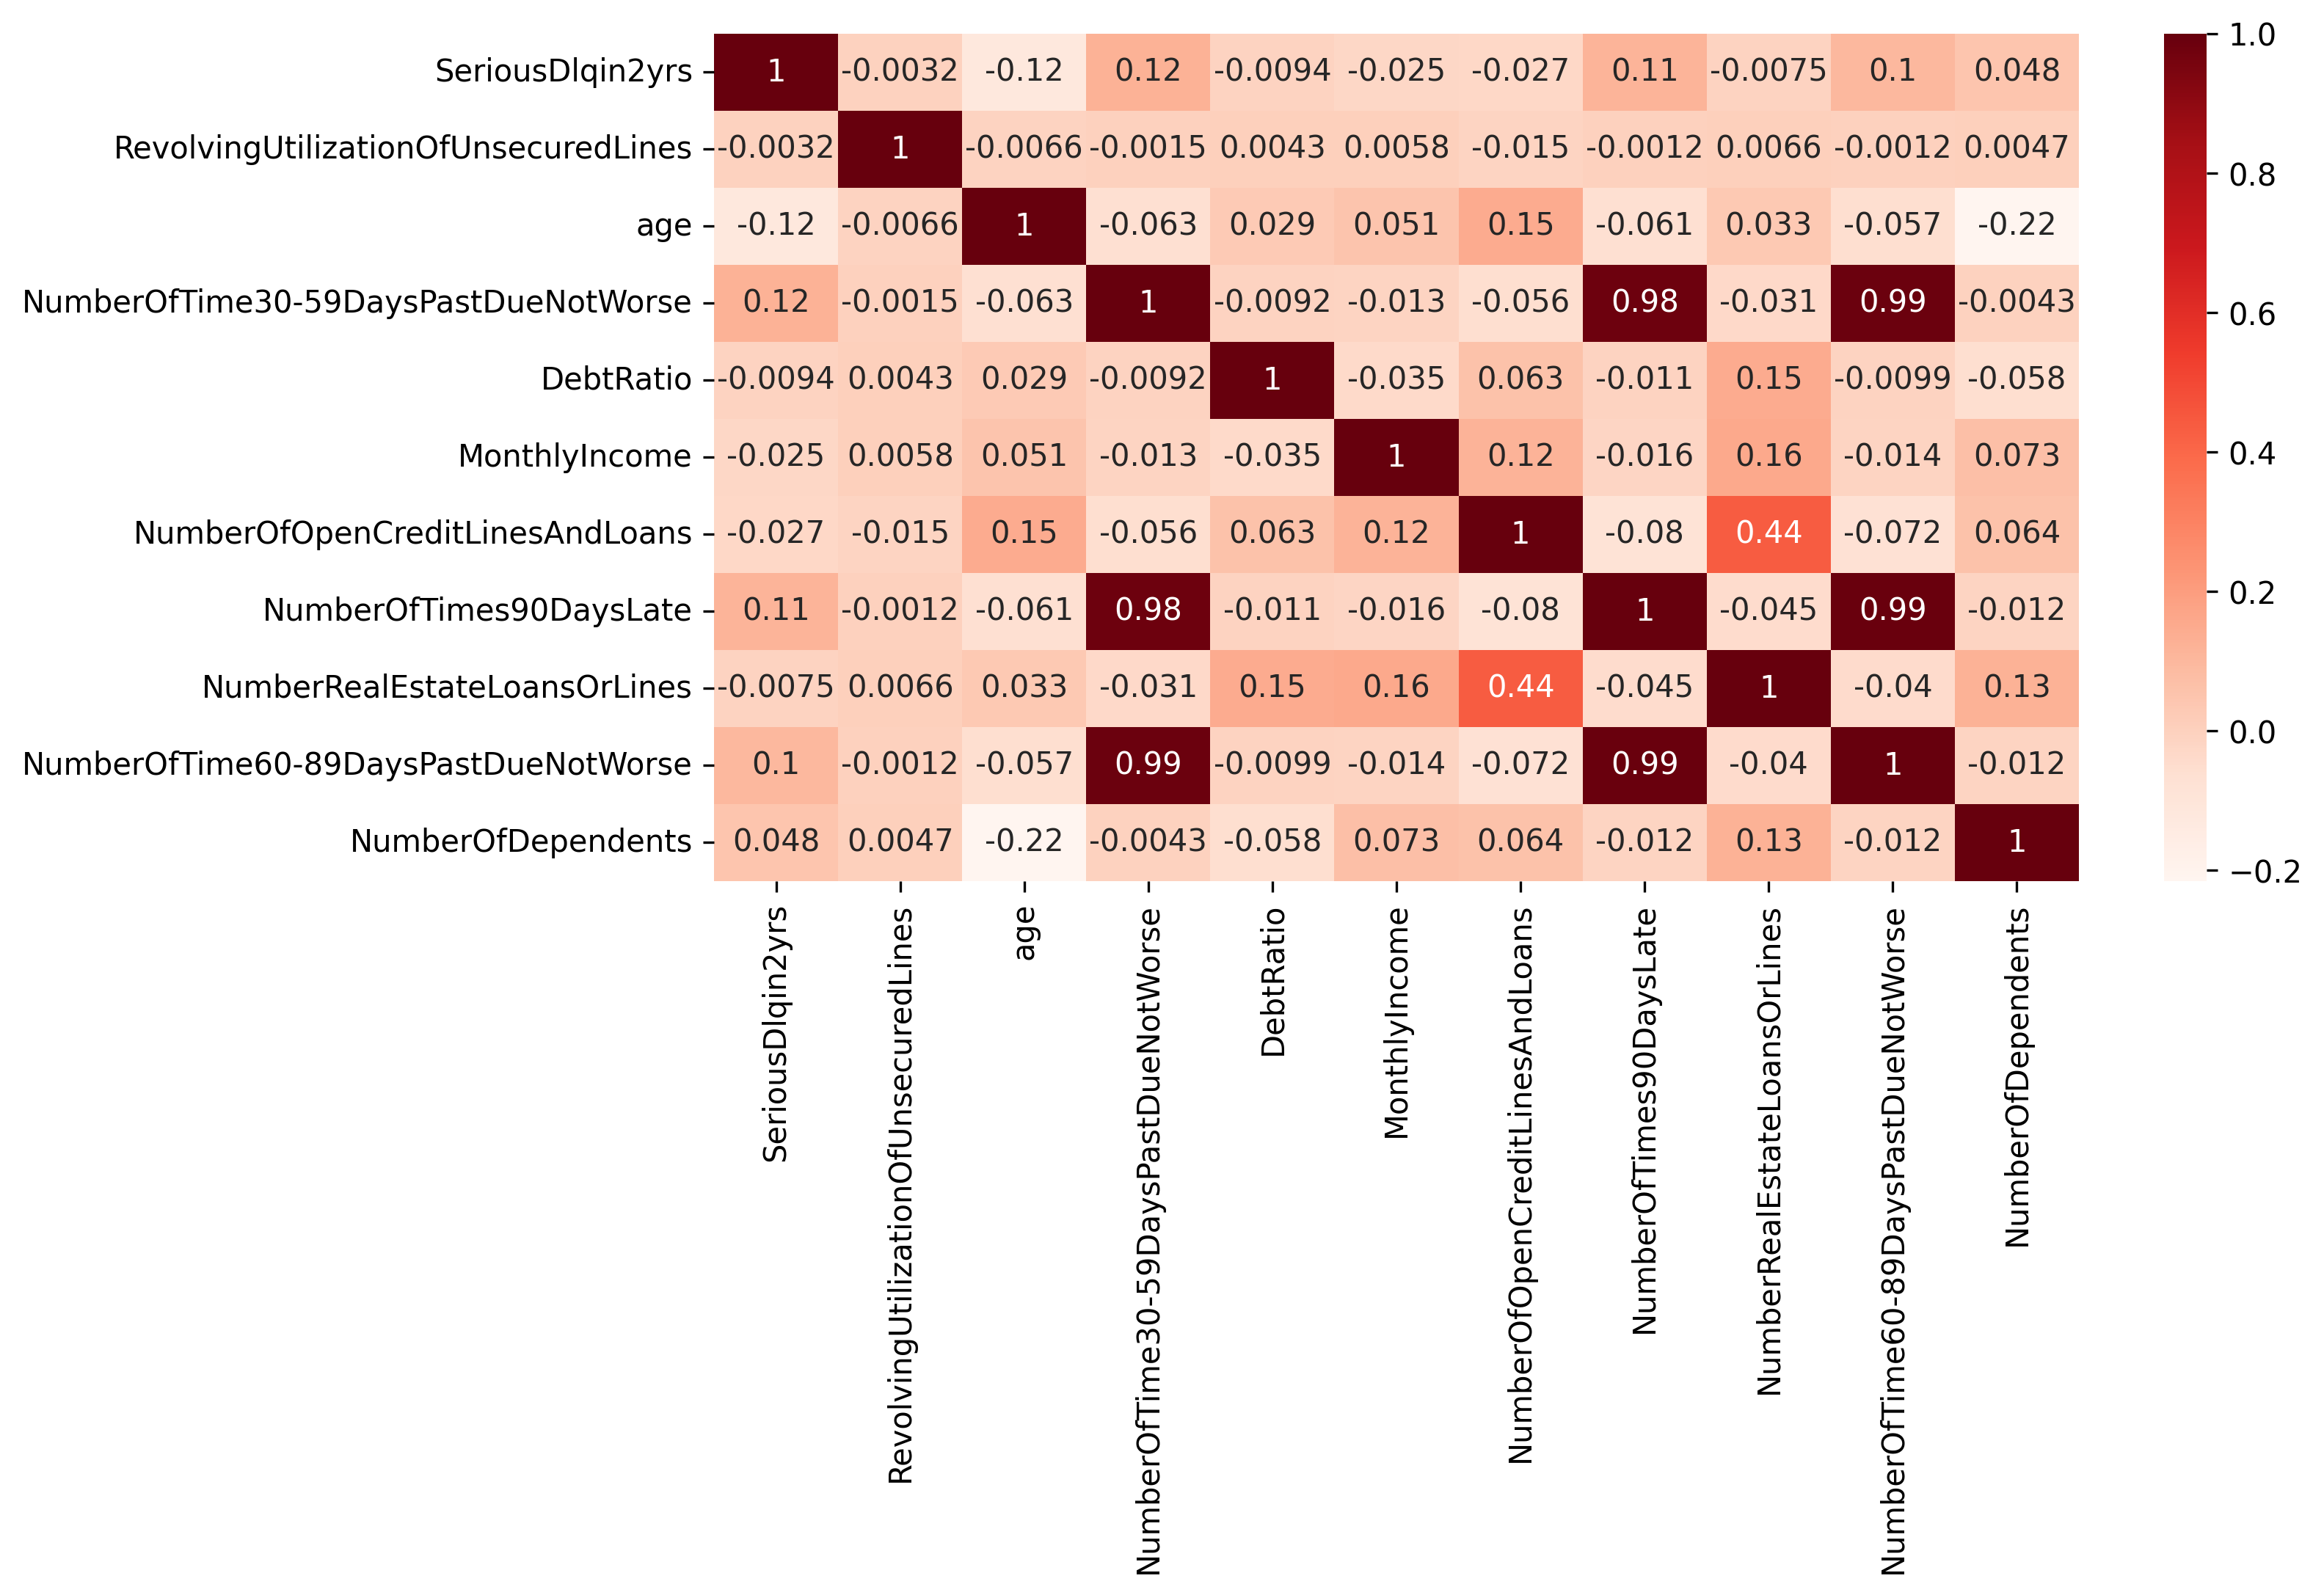

In [11]:
# As shown in the graph, the three fields related to the number of overdue incidents have very high collinearity; consider removing collinearity
plt.figure(figsize=(10,5),dpi=300)
sns.heatmap(train.corr(),cmap='Reds',annot=True)

In [12]:
def error_processing(df):
    '''
    Anomaly processing; the processing scheme can be repeatedly adjusted based on the modeling effect. It's advised to be cautious in deleting data.
    df: Data source
    '''
    def show_error(df,col,whis=1.5,show=False):
        '''
        Display the number of anomalies for upper and lower limits, with an option to show example anomaly data
        df: Data source
        col: Column name
        whis: Default is 1.5, corresponding to 1.5 times the IQR
        show: Whether to show example anomaly data
        '''
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) + whis * iqr # upper bound
        lower_bound = df[col].quantile(0.25) - whis * iqr # lower bound
        # print(iqr,upper_bound,lower_bound)
        print('【',col,'】Number of upper limit anomalies:',df[col][df[col] > upper_bound].count())
        if show:
            print('Example anomalies:\n',df[df[col] > upper_bound].head(5).T)
        print('【',col,'】Number of lower limit anomalies:',df[col][df[col] < lower_bound].count())
        if show:
            print('Example anomalies:\n',df[df[col] < lower_bound].head(5).T)
        print('- - - - - - ')

    def drop_error(df,col):
        '''
        Delete anomalies for upper and lower limits
        df: Data source
        col: Column name
        '''
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) + 1.5*iqr # upper bound
        lower_bound = df[col].quantile(0.25) - 1.5*iqr # lower bound
        data_del = df[col][(df[col] > upper_bound) | (df[col] < lower_bound)].count()
        data = df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
        # print('Total data deleted:',data_del)
        return data
    
    # Counter
    n = len(df)
    
    # Available credit limit
    # As can be seen from the distribution histogram, values greater than 1 should be errors.
    # Total errors are 3321, removal might affect modeling. Remove data >= 20000
    show_error(df,'RevolvingUtilizationOfUnsecuredLines')
    df = df[df.RevolvingUtilizationOfUnsecuredLines<=20000]

    # age
    # Not many anomalies, remove data where age is greater than 100 or less than 18
    show_error(df,'age')
    df = df[(df['age']>18) & (df['age']<100)]

    # NumberOfTime30-59DaysPastDueNotWorse
    # Remove anomalies > 80 as per the box plot
    show_error(df,'NumberOfTime30-59DaysPastDueNotWorse')
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse']<80]

    # NumberOfTimes90DaysLate
    # Remove anomalies > 80 as per the box plot
    show_error(df,'NumberOfTimes90DaysLate')
    df = df[df['NumberOfTimes90DaysLate']<80]

    # NumberOfTime60-89DaysPastDueNotWorse
    # Remove anomalies > 80 as per the box plot
    show_error(df,'NumberOfTime60-89DaysPastDueNotWorse')
    df = df[df['NumberOfTime60-89DaysPastDueNotWorse']<80]

    # DebtRatio
    # Remove anomalies > 100000 as per the box plot
    show_error(df,'DebtRatio')
    df = df[df['DebtRatio']<100000]

    # MonthlyIncome
    # Remove anomalies > 500000 as per the box plot
    show_error(df,'MonthlyIncome')
    df = df[(df['MonthlyIncome']<500000) | df.MonthlyIncome.isna()]

    # NumberRealEstateLoansOrLines
    # Remove anomalies > 20 as per the box plot
    show_error(df,'NumberRealEstateLoansOrLines')
    df = df[df['NumberRealEstateLoansOrLines']<20]

    # NumberOfDependents
    # Remove anomalies > 10 as per the box plot
    show_error(df,'NumberOfDependents')
    df = df[(df['NumberOfDependents']<12)|df.NumberOfDependents.isna()]

    # NumberOfOpenCreditLinesAndLoans - keep anomalies
    
    print('Total data deleted:', n - len(df), 'records.')
    
    


In [13]:
# Three types of defaults; high collinearity is evident from the correlation coefficient heatmap in the previous section
# Consider retaining 'NumberOfTimes90DaysLate' and calculate the ratio 'NumberOfTime60-89DaysPastDueNotWorse'/'NumberOfTime30-59DaysPastDueNotWorse'
def collineation_processing(df,col,col1,col2,name):
    '''
    Remove collinearity, retain one field and calculate the ratio of other fields
    df: Data source
    col: Field to retain
    col1, col2: Fields for calculating the ratio
    name: Name of the new ratio field
    '''
    def trans2percent(row):
        if row[col2] == 0:
            return 0
        else:
            return row[col1] / row[col2]
    df[name] = df.apply(trans2percent,axis=1)
#     df[[name,col]].corr()
    
# collineation_processing(df,'NumberOfTimes90DaysLate'，'NumberOfTime60-89DaysPastDueNotWorse'，'NumberOfTime30-59DaysPastDueNotWorse'，'Overdue 60-89 days / 30-59 days')

In [14]:
def missing_values_processing(df, func1=1, func2=1):
    '''
    Missing value processing
    df: Data source
    func1: Default is 1, fill dependents with mode; 0, remove rows with missing values.
    func2: Default is 1, fill MonthlyIncome with mode; 0, fill MonthlyIncome with mean.
    '''
    # NumberOfDependents - Remove or fill with mode
    if func1 == 1:
        df.loc[df.NumberOfDependents.isna(), 'NumberOfDependents'] = df.NumberOfDependents.mode()[0]
    elif func1 == 0:
        df = df.dropna(subset=['NumberOfDependents'])
    else:
        print('parameter wrong!')
    
    # MonthlyIncome - Remove or fill with mean
    if func1 == 1:
        df.loc[df.MonthlyIncome.isna(), 'MonthlyIncome'] = df.MonthlyIncome.mode()[0]
    elif func1 == 0:    
        df.loc[df.MonthlyIncome.isna(), 'MonthlyIncome'] = df.MonthlyIncome.mean()[0]
    else:
        print('parameter wrong!')

In [15]:
# Preliminary data exploration reveals an uneven distribution of the 'SeriousDlqin2yrs' label categories, necessitating resampling of the dataset
def resample(df):
    '''
    Ensure that the 0 and 1 categories of the 'SeriousDlqin2yrs' label each make up half of the sample to improve prediction results. Consider adding random_state to sample() to generate the same sample set
    df: Data source
    '''
    num = df['SeriousDlqin2yrs'].value_counts()[1]
    df_t = df[df.SeriousDlqin2yrs == 1]
    df_f = df[df.SeriousDlqin2yrs == 0].sample(frac=1)[0:num]
    df_balanced = pd.concat([df_t, df_f]).sample(frac=1).reset_index(drop=True)
    # print(df_balanced.SeriousDlqin2yrs.value_counts())
    return df_balanced

In [16]:
# Set 【df1】 as the dataset used for modeling the probability of default
df1 = train.copy()

# Anomaly processing
error_processing(df1)
# Remove collinearity
collineation_processing(df1, 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse/NumberOfTime30-59DaysPastDueNotWorse')
# Missing value processing
missing_values_processing(df1, func1=1, func2=1)
# Data resampling
df_balanced = resample(df1)

# Finally, divide the dataset into training and validation sets, with both split in an 8:2 ratio
# Columns that can be considered for removal: 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse/NumberOfTime30-59DaysPastDueNotWorse', 'SeriousDlqin2yrs'
X = df_balanced.drop(['SeriousDlqin2yrs', 'NumberOfTime60-89DaysPastDueNotWorse/NumberOfTime30-59DaysPastDueNotWorse'], axis=1) 
y = df_balanced['SeriousDlqin2yrs']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)    # random_state=42

# Stratified k-fold splitter - used for grid search
cv = StratifiedKFold(n_splits=3, shuffle=True)


【 RevolvingUtilizationOfUnsecuredLines 】Number of upper limit anomalies: 560
【 RevolvingUtilizationOfUnsecuredLines 】Number of lower limit anomalies: 0
- - - - - - 
【 age 】Number of upper limit anomalies: 34
【 age 】Number of lower limit anomalies: 0
- - - - - - 
【 NumberOfTime30-59DaysPastDueNotWorse 】Number of upper limit anomalies: 17963
【 NumberOfTime30-59DaysPastDueNotWorse 】Number of lower limit anomalies: 0
- - - - - - 
【 NumberOfTimes90DaysLate 】Number of upper limit anomalies: 6009
【 NumberOfTimes90DaysLate 】Number of lower limit anomalies: 0
- - - - - - 
【 NumberOfTime60-89DaysPastDueNotWorse 】Number of upper limit anomalies: 5482
【 NumberOfTime60-89DaysPastDueNotWorse 】Number of lower limit anomalies: 0
- - - - - - 
【 DebtRatio 】Number of upper limit anomalies: 23507
【 DebtRatio 】Number of lower limit anomalies: 0
- - - - - - 
【 MonthlyIncome 】Number of upper limit anomalies: 3656
【 MonthlyIncome 】Number of lower limit anomalies: 0
- - - - - - 
【 NumberRealEstateLoansOrLines 

In [17]:
# Function to review the performance of classification models
def perfomance_clf(model,X,y,name=None):
    y_predict = model.predict(X)
    if name:
        print(name,':')
    print(f'accuracy score is: {accuracy_score(y,y_predict)}')
    print(f'precision score is: {precision_score(y,y_predict)}')
    print(f'recall score is: {recall_score(y,y_predict)}')
    print(f'auc: {roc_auc_score(y,y_predict)}')
    print('- - - - - - ')

In [18]:
# Logistic regression model

In [19]:
# Logistic regression model
# Parameter settings
log_params = {"penalty": ['l1', 'l2'],
              'C': [0.001 * 10**i for i in range(0, 7)]}

# Parameter search
log_gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'), log_params, cv=cv,
                              n_jobs=-1, scoring='roc_auc', verbose=2, refit=True)

# Workflow pipeline
pipe_log = Pipeline([
    ('sc', StandardScaler()),    # Z-score normalization
    ('pow_trans', PowerTransformer()),    # Correction
    ('log_grid', log_gridsearch)
])

# Search for parameters and train the model
pipe_log.fit(xtrain, ytrain)

# Best parameter combination
print(pipe_log.named_steps['log_grid'].best_params_)

# Performance metrics on the training set
perfomance_clf(pipe_log, xtrain, ytrain, name='train')

# Performance metrics on the test set
perfomance_clf(pipe_log, xtest, ytest, name='test')

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01

In [20]:
# View the average score using cross-validation
cross_val_score(pipe_log,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01

0.857664843394085

In [21]:
# Random Forest classification model

In [32]:
# Random Forest classification model
rf_clf = RandomForestClassifier(criterion='gini',
                                n_jobs=-1,
                                n_estimators=1000)    # random_state

# Parameter settings
rf_grid_params = {'max_features': ['auto', 0.5, 0.6, 0.9],    # ['auto', 0.5, 0.6, 0.9] Set combinations when optimal parameters are unknown
                  'max_depth': [6, 9]}    # [3, 6, 9]

# Parameter search
rf_gridsearch = GridSearchCV(rf_clf, rf_grid_params, cv=cv,
                             n_jobs=-1, scoring='roc_auc', verbose=10, refit=True)

# Workflow pipeline
pipe_rf = Pipeline([
    ('sc', StandardScaler()),
    ('pow_trans', PowerTransformer()),
    ('rf_grid', rf_gridsearch)
])

# Search for parameters and train the model
pipe_rf.fit(xtrain, ytrain)

# Best parameter combination
print(pipe_rf.named_steps['rf_grid'].best_params_)

# Performance metrics on the training set
perfomance_clf(pipe_rf, xtrain, ytrain, name='train')

# Performance metrics on the test set
perfomance_clf(pipe_rf, xtest, ytest, name='test')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START max_depth=6, max_features=auto..............................
[CV 1/3; 1/8] END .max_depth=6, max_features=auto;, score=nan total time=   0.0s
[CV 2/3; 1/8] START max_depth=6, max_features=auto..............................
[CV 2/3; 1/8] END .max_depth=6, max_features=auto;, score=nan total time=   0.0s
[CV 3/3; 1/8] START max_depth=6, max_features=auto..............................
[CV 3/3; 1/8] END .max_depth=6, max_features=auto;, score=nan total time=   0.0s
[CV 1/3; 2/8] START max_depth=6, max_features=0.5...............................
[CV 1/3; 2/8] END max_depth=6, max_features=0.5;, score=0.864 total time=   9.7s
[CV 2/3; 2/8] START max_depth=6, max_features=0.5...............................
[CV 2/3; 2/8] END max_depth=6, max_features=0.5;, score=0.857 total time=   9.5s
[CV 3/3; 2/8] START max_depth=6, max_features=0.5...............................
[CV 3/3; 2/8] END max_depth=6, max_features=0.5;,

In [ ]:
# Caution!!! View the average score using cross-validation (this can be time-consuming due to the pipeline repeatedly searching for parameters)
cross_val_score(pipe_rf,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START max_depth=6, max_features=auto..............................
[CV 1/3; 1/8] END .max_depth=6, max_features=auto;, score=nan total time=   0.0s
[CV 2/3; 1/8] START max_depth=6, max_features=auto..............................
[CV 2/3; 1/8] END .max_depth=6, max_features=auto;, score=nan total time=   0.0s
[CV 3/3; 1/8] START max_depth=6, max_features=auto..............................
[CV 3/3; 1/8] END .max_depth=6, max_features=auto;, score=nan total time=   0.0s
[CV 1/3; 2/8] START max_depth=6, max_features=0.5...............................
[CV 1/3; 2/8] END max_depth=6, max_features=0.5;, score=0.859 total time=   7.2s
[CV 2/3; 2/8] START max_depth=6, max_features=0.5...............................
[CV 2/3; 2/8] END max_depth=6, max_features=0.5;, score=0.865 total time=   7.3s
[CV 3/3; 2/8] START max_depth=6, max_features=0.5...............................
[CV 3/3; 2/8] END max_depth=6, max_features=0.5;,

In [24]:
#xgboost model

In [25]:
# xgboost model
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            n_jobs=-1,
                            booster='gbtree',
                            n_estimators=1000,
                            learning_rate=0.01,
                            use_label_encoder=False,
                            eval_metric='auc'
                            )
# Parameter settings
xgb_params = {'max_depth':[6,9],    # Be mindful of parameter settings, as more parameters will increase computation time
             'subsample':[0.6,0.9],
             'colsample_bytree':[0.5,0.6],
             'reg_alpha':[0.05,0.1]}
# Parameter search
xgb_gridsearch = GridSearchCV(xgb_clf,xgb_params,cv=cv,n_jobs=-1,
                                 scoring='roc_auc',verbose=10,refit=True)
# Workflow pipeline
pipe_xgb = Pipeline([
    ('sc',StandardScaler()),
    ('pow_trans',PowerTransformer()),
    ('xgb_grid',xgb_gridsearch)
])
# Search for parameters and train the model
pipe_xgb.fit(xtrain,ytrain)
# Best parameter combination
print(pipe_xgb.named_steps['xgb_grid'].best_params_)
# Performance metrics on the training set
perfomance_clf(pipe_xgb,xtrain,ytrain,name='train')
# Performance metrics on the test set
perfomance_clf(pipe_xgb,xtest,ytest,name='test')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6
[CV 1/3; 1/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6;, score=0.867 total time=   5.2s
[CV 2/3; 1/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6
[CV 2/3; 1/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6;, score=0.862 total time=   5.3s
[CV 3/3; 1/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6
[CV 3/3; 1/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6;, score=0.864 total time=   5.2s
[CV 1/3; 2/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.9
[CV 1/3; 2/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.9;, score=0.867 total time=   5.4s
[CV 2/3; 2/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.9
[CV 2/3; 2/16] END colsample_bytree=0.5, 

In [26]:
# Caution!!! View the average score using cross-validation (this can be time-consuming due to the pipeline repeatedly searching for parameters)
cross_val_score(pipe_xgb,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6
[CV 1/3; 1/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6;, score=0.865 total time=   3.4s
[CV 2/3; 1/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6
[CV 2/3; 1/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6;, score=0.874 total time=   3.5s
[CV 3/3; 1/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6
[CV 3/3; 1/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.6;, score=0.862 total time=   3.3s
[CV 1/3; 2/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.9
[CV 1/3; 2/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.9;, score=0.865 total time=   3.6s
[CV 2/3; 2/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.05, subsample=0.9
[CV 2/3; 2/16] END colsample_bytree=0.5, 

0.8627532642251804

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

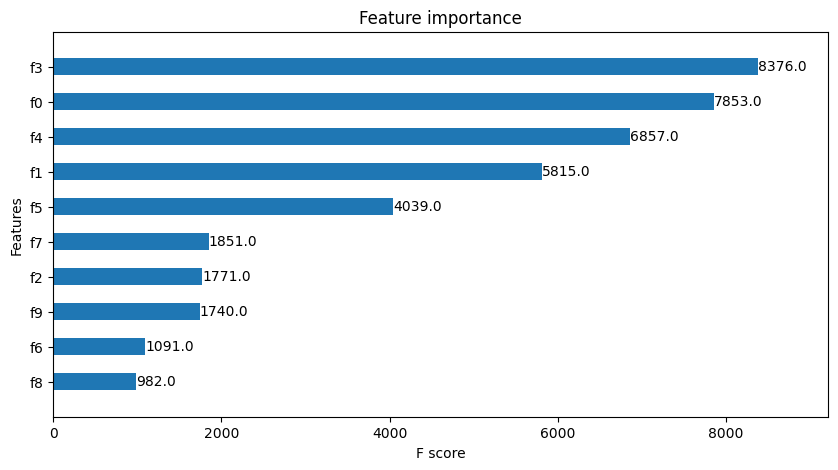

In [27]:
# View the importance of features relative to the xgboost model
# Typically, the fields ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'] are shown to be more important
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
xgb.plot_importance(pipe_xgb.named_steps['xgb_grid'].best_estimator_,
                       max_num_features=40,height=0.5,grid=False,ax=ax)
xtrain.columns

In [28]:
# Reading and processing the prediction dataset
dftest = pd.read_csv("./ConsumerCred-test.csv",sep = ",")
dftest.loc[dftest.NumberOfDependents.isna(),'NumberOfDependents'] = df1.NumberOfDependents.mode()[0]
dftest.loc[dftest.MonthlyIncome.isna(),'MonthlyIncome'] = df1.MonthlyIncome.mode()[0]

In [30]:
# Predict with the xgboost model and generate a CSV result file
result = pipe_xgb.predict_proba(dftest.drop('id',axis=1))
print(result)
result_ = [[n+1,i] for n,i in enumerate(result[:,1])]
print(result)
df_result = pd.DataFrame(result_,columns=['Id','Probability'])
print(df_result)
df_result.to_csv('sampleEntry.csv',index=False)

[[0.83673954 0.16326043]
 [0.8676889  0.13231114]
 [0.4417463  0.5582537 ]
 ...
 [0.40164697 0.598353  ]
 [0.70953995 0.29046005]
 [0.7470475  0.25295252]]
[[0.83673954 0.16326043]
 [0.8676889  0.13231114]
 [0.4417463  0.5582537 ]
 ...
 [0.40164697 0.598353  ]
 [0.70953995 0.29046005]
 [0.7470475  0.25295252]]
          Id  Probability
0          1     0.163260
1          2     0.132311
2          3     0.558254
3          4     0.733130
4          5     0.902937
...      ...          ...
37495  37496     0.827322
37496  37497     0.132443
37497  37498     0.598353
37498  37499     0.290460
37499  37500     0.252953

[37500 rows x 2 columns]
